# Data Exploration & Analysis of the Lehman Baseball Database
## http://seanlahman.com/baseball-archive/statistics

In [254]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from collections import namedtuple
import datetime as dt
from datetime import date
from datetime import datetime
from IPython.display import Image

### The data consists of over a dozen CSV files.  They offer a MySQL version but let's see if we can get away without that.

In [5]:
from os import listdir
from os.path import isfile, join
path = 'baseballdatabank-master/core/'
files = [f for f in listdir(path) if isfile(join(path, f)) and f[len(f) - 3:] == 'csv']
print(files)

dfs = {}
for f in files:
    dfs[f] = pd.read_csv(path + f)
    print(f)
    print(dfs[f].columns)

['AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'CollegePlaying.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'HomeGames.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Parks.csv', 'Pitching.csv', 'PitchingPost.csv', 'Salaries.csv', 'Schools.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv']
AllstarFull.csv
Index(['playerID', 'yearID', 'gameNum', 'gameID', 'teamID', 'lgID', 'GP',
       'startingPos'],
      dtype='object')
Appearances.csv
Index(['yearID', 'teamID', 'lgID', 'playerID', 'G_all', 'GS', 'G_batting',
       'G_defense', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf',
       'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr'],
      dtype='object')
AwardsManagers.csv
Index(['playerID', 'awardID', 'yearID', 'lgID', 'tie', 'notes'], dtype='object')
AwardsPlayers.csv
Index(['playerID', 'awa

# Desired Attributes (df name)
* height (height)
* age at debut (age_debut)
* debut year (debut_year)
* birth location
* bats (r or l)
* throws (r or l)
* years of school
* position played most
* number of positions played
* school location
* career year
* OBS
* label

## Master.csv

In [6]:
dfs['Master.csv'].head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


## Height

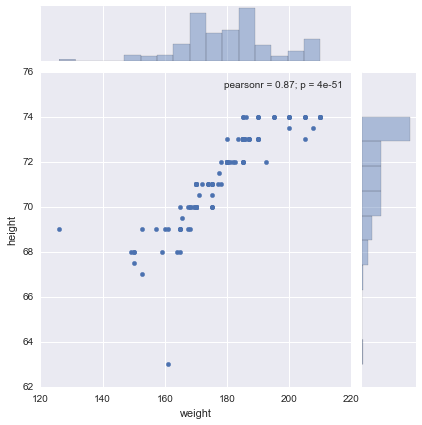

In [7]:
h_grp = dfs['Master.csv'].groupby(by='birthYear').median()
h = h_grp[['deathYear', 'weight', 'height']].reset_index()
sns.jointplot(h['weight'], h['height'])

### It looks like height is limited to 74 inches.  Humans don't work that way.

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


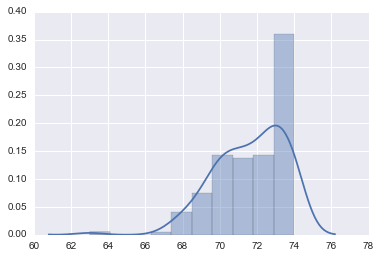

In [8]:
ht = [x for x in h['height'] if not np.isnan(x)]
sns.distplot(ht)

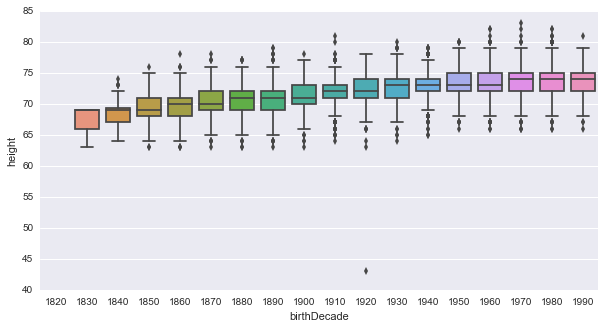

In [164]:
# sns.barplot(h['birthYear'], h['height'])
h = copy(dfs['Master.csv'][['playerID', 'birthYear', 'height']])
d = [str(x)[0:3] + '0' for x in h['birthYear']]
h['birthDecade'] = d
h = h.sort_values(by='birthDecade')
height = h[h['birthDecade'] != 'nan0']
plt.figure(figsize=(10,5))
sns.boxplot(x="birthDecade", y="height", data=height)

## Age at Debut

In [165]:
ad = copy(dfs['Master.csv'][['playerID', 'birthYear', 'birthMonth', 'birthDay', 'debut']])
d = [str(x)[0:3] + '0' for x in ad['birthYear']]
ad['birthDecade'] = d
ad = ad.sort_values(by='birthDecade')
ad = ad[ad['birthDecade'] != 'nan0']
ad = [row for idx, row in ad.iterrows() if not np.isnan(row.birthDay) 
      and not np.isnan(row.birthMonth) and not np.isnan(row.birthYear)
     and type(row.debut) == str]
ad = pd.DataFrame(ad)
ad['debut'] = [datetime.strptime(x, '%Y-%m-%d').date() for x in ad['debut'] if type(x) == str]
ad['birthYear'] = ad['birthYear'].astype(int)
ad['birthMonth'] = ad['birthMonth'].astype(int)
ad['birthDay'] = ad['birthDay'].astype(int)
ad['birthDate'] = [dt.date(row.birthYear, row.birthMonth, row.birthDay) for idx, row in ad.iterrows()]
ad['age_at_debut'] = [(row.debut - row.birthDate).days for idx, row in ad.iterrows()]
age_debut = ad[ad['age_at_debut'] > 0]
age_debut.head()

,playerID,birthYear,birthMonth,birthDay,debut,birthDecade,birthDate,age_at_debut
2558,carlle01,1832,2,25,1874-09-09,1830,1832-02-25,15537
18672,yeatmbi01,1838,3,10,1872-04-20,1830,1838-03-10,12460
13094,pearcdi01,1836,2,29,1871-05-18,1830,1836-02-29,12862
18605,wrighha01,1835,1,10,1871-05-05,1830,1835-01-10,13264
745,barkeal01,1839,1,18,1871-06-01,1830,1839-01-18,11822


It appears the debut ages aren't correct for at least some of the 1830s

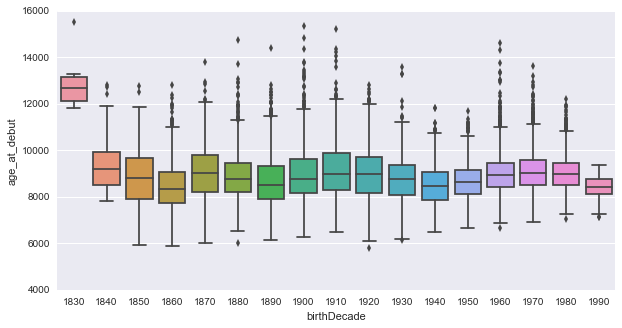

In [166]:
plt.figure(figsize=(10,5))
sns.boxplot(x='birthDecade', y='age_at_debut', data=age_debut)

## Debut Year

In [172]:
debut_year = copy(dfs['Master.csv'][['playerID', 'debut']])
debut_year = pd.DataFrame([row for idx, row in ad.iterrows() if type(row.debut) == str])
debut_year['debut_year'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in debut_year['debut'] if type(x) == str]
debut_year.head()

,playerID,debut,debut_year
0,aardsda01,2004-04-06,2004
1,aaronha01,1954-04-13,1954
2,aaronto01,1962-04-10,1962
3,aasedo01,1977-07-26,1977
4,abadan01,2001-09-10,2001


In [173]:
ad_grp = debut_year.groupby(by='debut_year').count()
debut_year_cnt = ad_grp.reset_index()
del debut_year_cnt['debut']
debut_year_cnt.columns = ['debut_year', 'count']
debut_year_cnt.head()

,debut_year,count
0,1871,115
1,1872,64
2,1873,33
3,1874,30
4,1875,84


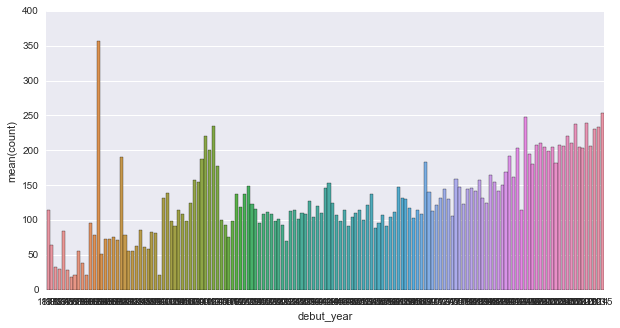

In [174]:
plt.figure(figsize=(10,5))
sns.barplot(debut_year_cnt['debut_year'], debut_year_cnt['count'])

## Birth Location

In [189]:
birth_loc = copy(dfs['Master.csv'][['playerID', 'debut', 'birthCountry', 'birthState']])
birth_loc = pd.DataFrame([row for idx, row in birth_loc.iterrows() if type(row.debut) == str])
birth_loc['debutYear'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in birth_loc['debut'] if type(x) == str]
d = [str(x)[0:3] + '0' for x in birth_loc['debut']]
birth_loc['debutDecade'] = d
birth_loc = birth_loc.sort_values(by='debutDecade')
birth_loc = birth_loc[birth_loc['debutDecade'] != 'nan0']
birth_loc.head()

,playerID,debut,birthCountry,birthState,debutYear,debutDecade
11918,morrijo01,1876-04-24,USA,MA,1876,1870
6356,goodmja01,1878-05-02,USA,PA,1878,1870
11573,milleto01,1874-10-24,USA,PA,1874,1870
794,barnibi01,1874-05-07,USA,NY,1874,1870
5202,fergubo01,1871-05-18,USA,NY,1871,1870


In [253]:
birth_loc_cnt = birth_loc.groupby(['birthCountry', 'debutDecade']).count()
birth_loc_cnt = birth_loc_cnt.reset_index()
birth_loc_d_cnt = birth_loc.groupby(['debutDecade']).count()
birth_loc_d_cnt = birth_loc_d_cnt.reset_index()
birth_loc_d_cnt = birth_loc_d_cnt[['debutDecade', 'playerID']]
birth_loc_d_cnt.columns = ['debutDecade', 'count']
birth_loc_d_cnt = birth_loc_d_cnt.sort_values('debutDecade')
birth_loc_cnt = birth_loc_cnt.sort_values('debutDecade').reset_index()
birth_loc_cnt = pd.merge(birth_loc_cnt, birth_loc_d_cnt, on='debutDecade')
birth_loc_cnt = birth_loc_cnt[['birthCountry', 'debutDecade', 'playerID', 'count']]
birth_loc_cnt.columns = ['birthCountry', 'debutDecade', 'count', 'count_decade']
birth_loc_cnt['USA_pct'] = birth_loc_cnt['count'] / birth_loc_cnt['count_decade']
birth_loc_cnt.to_csv('baseball_birth_location_pct.csv')
birth_loc_cnt.head()

,birthCountry,debutDecade,count,count_decade,USA_pct
0,USA,1870,382,448,0.852679
1,Ireland,1870,12,448,0.026786
2,Germany,1870,4,448,0.008929
3,Netherlands,1870,1,448,0.002232
4,France,1870,1,448,0.002232


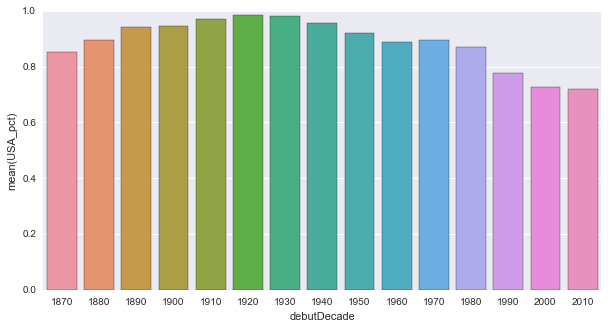

In [248]:
birth_loc_cnt_usa = birth_loc_cnt[birth_loc_cnt['birthCountry'] == 'USA']
plt.figure(figsize=(10,5))
sns.barplot(x='debutDecade', y='USA_pct', data=birth_loc_cnt_usa)

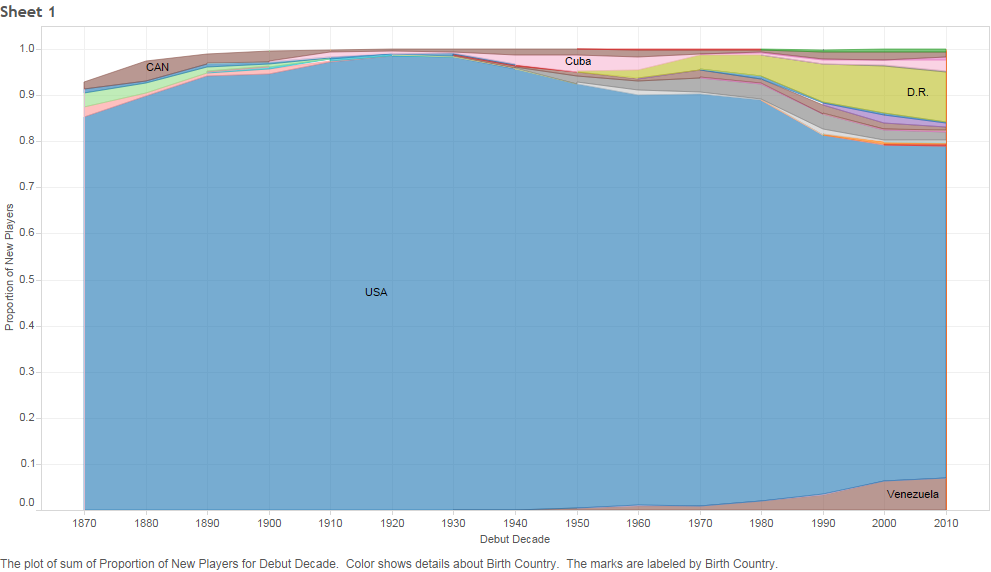

In [256]:
Image(filename='baseball_birth_country.png')